# 機器學習 - 回歸模型 (Regression Model) (3)
- 2022 機器學習 Summer Session 教材 (師培中心)<br>
- @ 台南應用科技大學 資管系 杜主民

# 三、多元(複)迴歸 Multiple Regression
- 多元(複)迴歸與簡單線性迴歸的差異是前者的自變數 (特徵值) 有兩個或以上的情況。
- 多元(複)迴歸的數學表示式如下:
### $y = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n, \,\,\, i=1...n$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[7,5]

In [2]:
# 讀取外部 Advertising.csv 檔案
data = pd.read_csv('./data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


```
這是一份有 4 個欄位共 200 筆資料的資料集，記載透過TV(x1), Radio(x2), 以及 Newspaper(x3)  三種廣告的花費金額，
以及相對應的產品銷售金額 (Y)。
```
- 其中前 3 個欄位 - TV, Radio, Newspaper 是自變數 (特徵, features)。
- Sales 是應變數 (標籤, label response)。
- 我們希望以 TV 廣告、Radio 廣告，以及 Newspaper 廣告 3 個 features 預測 Sales 的銷售數量。
- <a href='https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset'>Reference</a>

### 關於自變數 (特徵, features):
- TV: 單一個產品的某個銷售區域的電視廣告費用 (單位: 美金佰元)。
- Radio: 單一個產品的某個銷售區域的收音機廣告費用 (單位: 美金佰元)。
- Newspaper: 單一個產品的某個銷售區域的報紙廣告費用 (單位: 美金佰元)。

#### 關應變數 (標籤, response label):
- Sales: 單一個產品在某個地區的銷售收入 (單位:美金仟元)。

#### 我們可以很明確地看出，應變數標籤 (response label) 是連續型型態 (Continuous)，這是屬於 Regression 的題目。

### $y = w_0 + w_1 \times TV + w_2 \times Radio + w_3 \times Newspaper$ 
- $y$: Sales, 目標應變數
- $w_0$: 是截距 (intercept)
- $w_1$: 是 TV 的 coefficient (第一個 feature)
- $w_2$: 是 Radio 的 coefficient (第二個 feature)
- $w_3$: 是 Newspaper 的 coefficient (第三個 feature)
- 綜合來看，$w_0$, $w_1$, $w_2$, $w_3$ 稱為 model coefficients (模型參數)，因為機器學習的模型中在訓練中學習這些參數的最佳數值，然後此機器學習的模型便可用於預測可能的結果。

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

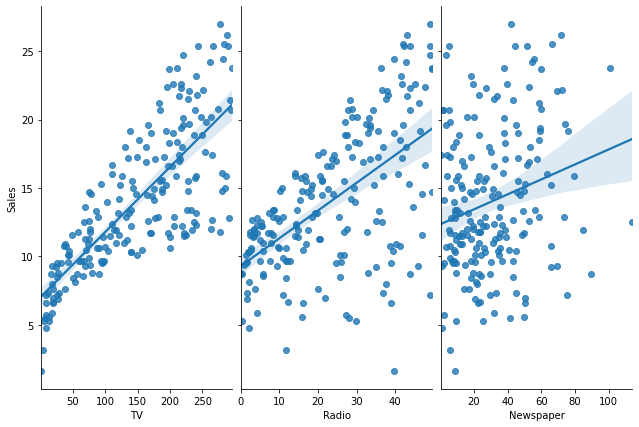

In [7]:
# x_vars 是 features; v_vars 是 label response
# height 參數是圖的高度
# aspect 是圖的寬度比例
# kind='reg' 是設定劃出迴歸線； kind='scatter' 則是單純的散布圖
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=6, aspect=0.5, kind='reg')

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(9,8)})

### 利用 seaborn 套件的熱度圖 (Heatmap) 觀察 features 和 target 之間的 <a href='https://terms.naer.edu.tw/detail/1307611/'>相關係數</a>。

<AxesSubplot:>

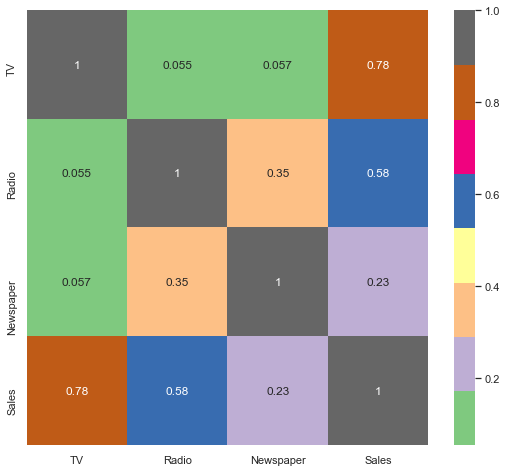

In [12]:
sns.heatmap(data.corr(), cmap="Accent", annot=True)

In [13]:
# 建立 Python list 的 feature names
feature_cols = ['TV', 'Radio', 'Newspaper']  
X = data[feature_cols]  # 等同 X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

## 分割資料框 data 成為訓練資料集 (training data) 和測試資料集 (testing data)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (150, 3)
X_test.shape: (50, 3)
y_train.shape: (150,)
y_test.shape: (50,)


## 以 scikit-learn 建立 Multiple Regression 模型

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # 建立 Linear Regression 物件
model.fit(X_train, y_train) # 訓練資料

LinearRegression()

### 解釋模型的迴歸係數 (coefficients)

In [19]:
# print the intercept and coefficients
w0 = model.intercept_
w123 = model.coef_
print(f'w0:{w0}')
print(f'w1:{w123[0]}')
print(f'w2:{w123[1]}')
print(f'w3:{w123[2]}')

w0:2.8769666223179318
w1:0.04656456787415028
w2:0.17915812245088836
w3:0.0034504647111804412


In [20]:
list(zip(feature_cols, w123))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804412)]

所以，前述的 TV, Radio, Newspaper 自變數和應變數 Sales 的多元(複)迴歸公式:<br>
### $y = w_0 + w_1 \times TV + w_2 \times Radio + w_3 \times Newspaper$ 
可以改寫為:<br>
### $y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$

#### 該如何解釋 ('TV', 0.046564567874150295)、('Radio', 0.1791581224508883) 以及 ('Newspaper', 0.0034504647111804065)?
- 以 TV 來說，在 Radio 和 Newspaper 廣告費用不變動的情形下，每**增加一個"單位"的 TV 廣告費用**，會關聯到 **0.0466個"單位"** 的銷售量。
- 例如，在 Radio 和 Newspaper 廣告費用不變動的情形下，**增加 1 個單位 (佰元) 的 TV 廣告費用**， 會關聯到 **0.0466 個單位 (仟元)** 產品銷售金額。換句話說，增加 100 美金的 TV 廣告費用，會增加 0.04656$\times$1000=46.56元的銷售金額。

- 以 Radio 來說，在 TV 和 Newspaper 廣告費用不變動的情形下，每**增加一個"單位"的 Radio 廣告**，會關聯到 **0.179 個"單位"**的銷售量。
- 例如，在 TV 和 Newspaper 廣告費用不變動的情形下，**增加 1 個單位 (佰元) 的 Radio 廣告費用**， 會關聯到 **0.179 個單位 (仟元)**產品銷售金額。換句話說，增加 100 美金的 Radio 廣告費用，會增加 0.179$\times$1000=179元的銷售金額。

- 以 Newspaper 來說，在 TV 和 Radio 廣告費用不變動的情形下，每**增加一個"單位"的 Newspaper 廣告**，會關聯到 **0.00345 個"單位"**的銷售量。
- 例如，在 TV 和 Radio 廣告費用不變動的情形下，**增加 1 個單位 (佰元) 的 Newspaper 廣告費用**， 會關聯到 **0.00345 個單位 (仟元)**產品銷售金額。換句話說，增加 100 美金的 Newspaper 廣告費用，會增加 0.00345$\times$1000=3.45元的銷售金額。

## 預測結果
### 如果給予 TV 200 單位 (一個單位是100元)的廣告，Radio 是 50 單位 (一個單位是100元)的廣告，Newspaper 是 60 個單位是100元)的廣告，請預估銷售量 Sales 是多少 (單元 1000元)。

In [27]:
result1 = model.predict([[200, 50, 60]])
print(f'大約是 {np.round(result1, 2)*1000}元')

大約是 [21350.]元


### 那麼，如果在 Radio 和 Newspaper 預算不提升的情況下，將 TV 的廣告預算提升至 300 單位，請預估銷售量 Sales 是多少元? 和 TV是 200 單位廣告預算相差多少元?

In [37]:
result2 = model.predict([[300, 50, 60]])
print(f'大約是 {np.round(result2, 2)*1000}元')
print(f'相差 {(result2 - result1)*1000}元')

大約是 [26010.]元
相差 [4656.45678742]元


### 那麼，如果在 TV 和 Newspaper 預算不提升的情況下，將 Radio 的廣告預算提升至 150 單位，請預估銷售量 Sales 是多少元? 和 Radio 是 50 單位廣告預算相差多少元?

In [39]:
result3 = model.predict([[200, 150, 60]])
print(f'大約是 {np.round(result3, 2)*1000}元')
print(f'相差 {(result3 - result1)*1000}元')

大約是 [39270.]元
相差 [17915.81224509]元


## 檢驗

In [40]:
# 計算 R^2
r_squared = model.score(X,y)        
print('r_squared: ', r_squared)

r_squared = model.score(X_train,y_train)      # 訓練資料 R^2
print('訓練資料 r_squared: ', r_squared)

r_squared = model.score(X_test,y_test)        # 測試資料 R^2
print('測試資料 r_squared: ', r_squared)

r_squared:  0.8963161233045729
訓練資料 r_squared:  0.890307557755665
測試資料 r_squared:  0.9156213613792232


### 只用 TV 當自變數

In [41]:
data = pd.read_csv('./data/Advertising.csv', index_col=0)
X_TV = data['TV'] 
X_TV = np.array(X_TV).reshape(len(X_TV),1)
y = data['Sales']

In [43]:
from sklearn.linear_model import LinearRegression
tvModel = LinearRegression()  
tvModel.fit(X_TV, y) 
tv_r2_squared = tvModel.score(X_TV, y)        
print('tv_r2_squared: ', tv_r2_squared)

tv_r2_squared:  0.611875050850071


### 只用 Radio 當自變數

In [44]:
X_Radio = data['Radio'] 
X_Radio = np.array(X_Radio).reshape(len(X_Radio),1)

In [45]:
radioModel = LinearRegression()  
radioModel.fit(X_Radio, y) 
radio_r2_squared = radioModel.score(X_Radio, y)       
print('radio_r2_squared: ', radio_r2_squared)

radio_r2_squared:  0.33203245544529525


### 只用 Newspaper 當自變數

In [47]:
X_Newspaper = data['Newspaper'] 
X_Newspaper = np.array(X_Newspaper).reshape(len(X_Newspaper),1)

In [48]:
newsModel = LinearRegression()  
newsModel.fit(X_Newspaper, y) 
news_r2_squared = newsModel.score(X_Newspaper, y)       
print('news_r2_squared: ', news_r2_squared)

news_r2_squared:  0.05212044544430516


## Newspaper 的效果不佳，擬剔除此變數

### 移除不顯著的 Newspaper，使用 TV 及 Radio 兩個自變數，重新建構模型

In [49]:
X_new = data[['TV','Radio']]
tvradiomodel = LinearRegression()  
tvradiomodel.fit(X_new, y) 
tvradio_r2_squared = tvradiomodel.score(X_new, y)       
print('tvradio_r2_squared: ', tvradio_r2_squared)

tvradio_r2_squared:  0.8971942610828956


### 使用 TV 及 Radio 兩者當自變數，效果顯然不錯。
### 事實上，我們可以從皮爾森相關係數大致看出自變數之間，以及自變數和應變數之間的關係。

### $$r = \frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^n(x_i-\bar x)^2}{\sqrt{\sum_{i=1}^n(y_i-\bar y)^2}}}$$

In [11]:
# 計算 TV 與 Sales 的皮爾森相關係數
TV_mean = X['TV'].mean()
np.sum((X.TV-TV_mean)*(y-y.mean()))/(np.sqrt(np.sum((X['TV']-X['TV'].mean())**2)) * np.sqrt(np.sum((y-y.mean())**2)))

0.7822244248616063

## 檢查 features 的皮爾森相關係數 (Pearson Correlation)
- 皮爾森相關係數代表兩組數據的相關程度和方向。
- 皮爾森相關係數值範圍在 -1.0 和 1.0 之間。
- -1.0 的相關性表示完全的負相關，而 1.0 的相關性表示完全的正相關。0.0 的相關性表明兩個變量的移動之間沒有線性關係。

In [13]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### 利用 seaborn 的熱度圖 (heatmap)可先行檢視欄位資料間的關係

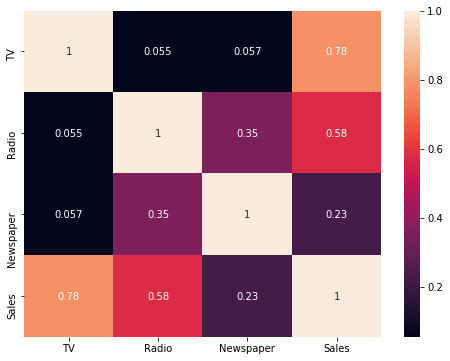

In [16]:
sns.heatmap(data.corr(), annot=True)

<hr style='border-color:brown; border-width:3px'>

## 酒吧啤酒消費量和天氣的關係案例
- 啤酒可能是全世界最受歡迎的飲料之一。在巴西聖保羅一所大學附近的酒吧，有一個學生想瞭解每天啤酒的銷售量和否和當天天氣存在某些關係性。他從 2015 年從 1 月 1 日開始，一直到 12 月 31 日止，每天在酒吧做成的記錄如底下的 kaggle 連結。
- 請讀取 kaggle 資料集: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### 若要以迴歸進行分析，應該如何挑選自變數？有辦法順利帶入資料後分析嗎？有哪些數據需要再處理？那些自變數和啤酒消耗量是正相關哪些是負相關？那個自變數有最大的影響力？

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
beer = pd.read_csv('./data/BeerConsumption.csv')
beer.head()

,Date,AverageTemp,MinimumTemp,MaximumTemp,Percipitation,Weekend,BeerConsumption
0,2015/1/1,"27,3","23,9","32,5",0,0,25.461
1,2015/1/2,"27,02","24,5","33,5",0,0,28.972
2,2015/1/3,"24,82","22,4","29,9",0,1,30.814
3,2015/1/4,"23,98","21,5","28,6","1,2",1,29.799
4,2015/1/5,"23,82",21,"28,3",0,0,28.900


### $$啤酒消耗量 = w_0+w_1平均溫度+w_2最低溫度+w_3最高溫度+w_4雨量+w_5是否假日$$
### $$y = w_0 + w_1x_1 + w-2x_2 + w_3x_3+w_4x_4+w_5x_5$$

<AxesSubplot:>

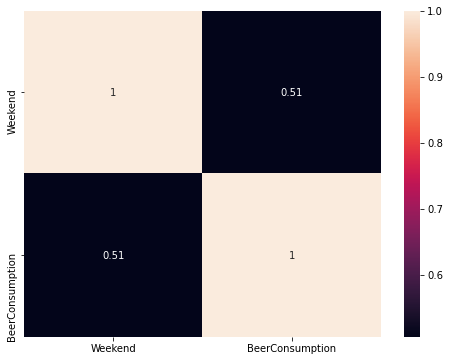

In [3]:
sns.heatmap(beer.corr(), annot=True)

### 為什麼 Heatmap 看起來不怎麼對?

In [4]:
beer.dtypes

Date                object
AverageTemp         object
MinimumTemp         object
MaximumTemp         object
Percipitation       object
Weekend              int64
BeerConsumption    float64
dtype: object

In [5]:
# type(beer.AverageTemp.apply(lambda x: x.replace(',', '.'))[0]) # 檢查資料型態

str

### 更改逗號及資料型態

In [5]:
beer.AverageTemp = beer.AverageTemp.apply(lambda x: x.replace(',', '.')).astype(np.float32)
beer.MinimumTemp = beer.MinimumTemp.apply(lambda x: x.replace(',', '.')).astype(np.float32)
beer.MaximumTemp = beer.MaximumTemp.apply(lambda x: x.replace(',', '.')).astype(np.float32)
beer.Percipitation = beer.Percipitation.apply(lambda x: x.replace(',', '.')).astype(np.float32)

# 較簡便的寫法
# df2 = beer.iloc[:, [1, 2, 3, 4]]
# for d in df2:
#     beer[d] = df2[d].apply(lambda x: x.replace(',', '.')).astype(np.float32)

# 或者
#beer.replace({',':'.'}, regex=True, inplace=True) # 逗號改為小數點
#df2 = beer.iloc[:, [1, 2, 3, 4]]
#for d in df2:
#    beer[d] = df2[d].astype(np.float32)

In [6]:
beer.corr()

,AverageTemp,MinimumTemp,MaximumTemp,Percipitation,Weekend,BeerConsumption
AverageTemp,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
MinimumTemp,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
MaximumTemp,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Percipitation,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Weekend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
BeerConsumption,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


<AxesSubplot:>

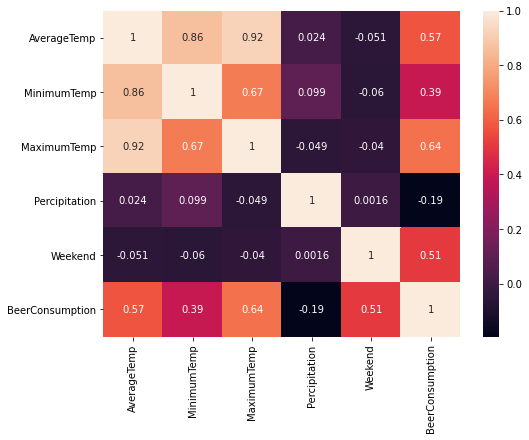

In [7]:
sns.heatmap(beer.corr(), annot=True)

### 修訂 Date 欄位為日期資料型態

In [9]:
from datetime import datetime
beer['Date'] = pd.to_datetime(beer['Date'], format='%Y/%m/%d')

### 測試 weekday() 轉換日期為星期幾的函數

In [32]:
t = beer['Date'][0].weekday()

### 轉換日期為星期的第幾天

In [33]:
weekdays = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
beer['Weekday'] = beer['Date'].apply(lambda x: weekdays[x.weekday()])  # 新增一個 Weekday 欄位
beer.head()

,Date,AverageTemp,MinimumTemp,MaximumTemp,Percipitation,Weekend,BeerConsumption,Weekday
0,2015-01-01,27.299999,23.9,32.500000,0.0,0,25.461,Thursday
1,2015-01-02,27.020000,24.5,33.500000,0.0,0,28.972,Friday
2,2015-01-03,24.820000,22.4,29.900000,0.0,1,30.814,Saturday
3,2015-01-04,23.980000,21.5,28.600000,1.2,1,29.799,Sunday
4,2015-01-05,23.820000,21.0,28.299999,0.0,0,28.900,Monday


### 畫出 bar chart (條狀圖)
- 繪製從星期一到星期天每天啤酒的消耗量
- 使用 seaborn 的 barplot()

In [37]:
# 以 Weekday 群組化，計算每天啤酒消耗的平均值
#gp = beer.groupby('Weekday')
#gp.BeerConsumption.mean()

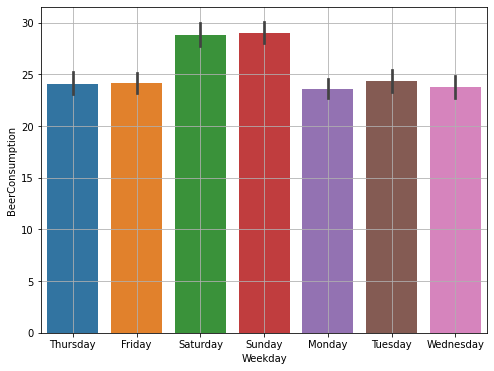

In [38]:
plt.figure(figsize=(8, 6))
#plt.rcParams['figure.figsize']=[8,6]
sns.barplot(x='Weekday', y='BeerConsumption', data=beer)
plt.grid(True)

### 再次以視覺圖形觀察溫度和啤酒消耗量的關係
- 使用 seaborn 的 pariplot() 

### 平均溫度

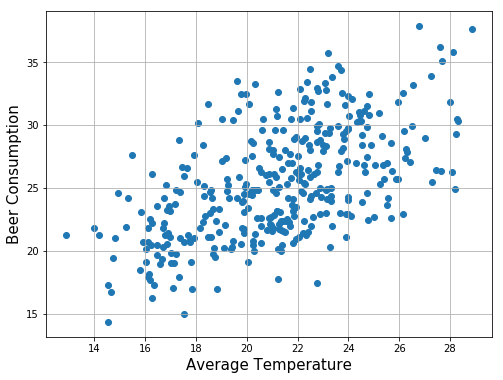

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(beer['AverageTemp'], beer['BeerConsumption'])
plt.xlabel('Average Temperature', fontsize=15)
plt.ylabel('Beer Consumption', fontsize=15)
plt.grid(True)

### 最高溫 vs 最低溫

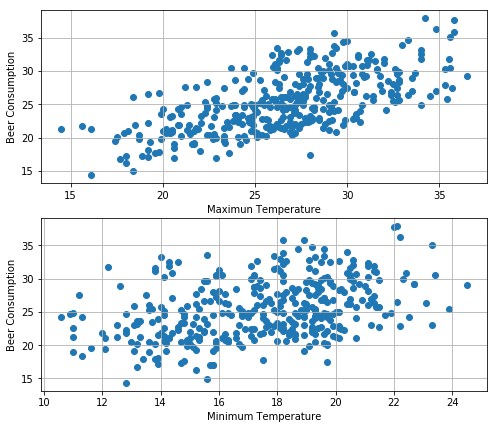

In [59]:
plt.rcParams['figure.figsize']=[8,7]
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.scatter(beer['MaximumTemp'], beer['BeerConsumption'])
ax2.scatter(beer['MinimumTemp'], beer['BeerConsumption'])
#ax1.set_title('Maximum Temperature')
#ax2.set_title('Minimum Temperature')
ax1.set_xlabel('Maximun Temperature')
ax1.set_ylabel('Beer Consumption')
ax2.set_xlabel('Minimum Temperature')
ax2.set_ylabel('Beer Consumption')
ax1.grid(True)
ax2.grid(True)

### pairplot
- 最高溫、最低溫與啤酒消耗量

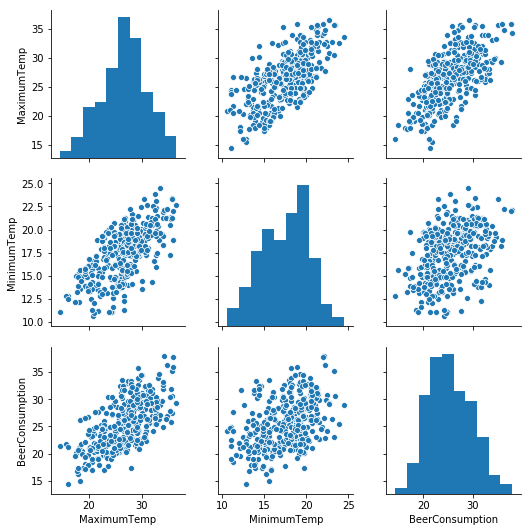

In [60]:
sns.pairplot(beer[['MaximumTemp', 'MinimumTemp','BeerConsumption']])

### pairplot
- 雨天與啤酒消耗量

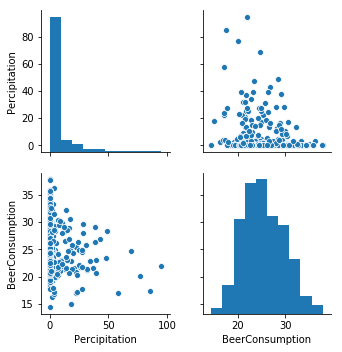

In [61]:
sns.pairplot(beer[['Percipitation','BeerConsumption']])

## 進行回歸分析

### 1.分割資料框 data 成為訓練資料集 (training data) 和測試資料集 (testing data)

In [62]:
# 選出特徵欄位
X = beer[['AverageTemp','MinimumTemp','MaximumTemp','Percipitation','Weekend']]

# 選出 response label 欄位
y = beer['BeerConsumption']

In [63]:
# 分割訓練資料與測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [65]:
# 檢查 type of X 以及 Shape 
print(type(X_train), X_train.shape, type(y_train), y_train.shape)
print(type(X_test), X_test.shape, type(y_test), y_test.shape)

<class 'pandas.core.frame.DataFrame'> (255, 5) <class 'pandas.core.series.Series'> (255,)
<class 'pandas.core.frame.DataFrame'> (110, 5) <class 'pandas.core.series.Series'> (110,)


### 2.以 scikit-learn 建立 Linear Regression 模型

In [66]:
# import model
from sklearn.linear_model import LinearRegression

# 建立 Linear Regression 物件
beerReg = LinearRegression()

# 將訓練資料 (X_train, y_train) 代入 linreg (Linear Regression)建立模型
beerReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 解釋模型的參數 (coefficients)

In [67]:
print(beerReg.intercept_)
print(beerReg.coef_)

6.30943431698746
[ 0.14760251 -0.16374515  0.66788313 -0.06269611  5.08940743]


In [70]:
for i, j in zip(['AverageTemp','MinimumTemp','MaximumTemp','Percipitation','Weekend'], beerReg.coef_):
    print('({}, {})'.format(i, j))

(AverageTemp, 0.14760250674450462)
(MinimumTemp, -0.1637451521385344)
(MaximumTemp, 0.6678831250606023)
(Percipitation, -0.06269610531892811)
(Weekend, 5.089407425067614)


### 預測

In [87]:
y_pred = beerReg.predict(X_test)

- 上述 **AverageTemp**,**MinimumTemp**,**MaximumTemp**,**Percipitation**,**Weekend** 自變數，以及應變數 **BeerConsuption** 的多元線性迴歸式:
### $$y = w_0 + w_1x_1 + w-2x_2 + w_3x_3+w_4x_4+w_5x_5$$
可以改寫為:
#### $$y = 6.309 + 0.148AverageTemp - 0.164MinimumTemp + 0.668MaximumTemp - 0.0627Percipitation + 5.089Weekend$$

- 以 **AverageTemp** 來說，在其它自變數不變動的情形下，每**增加一個"單位"的 AverageTemp**，會關聯到 **0.148 "單位"**的啤酒銷售量。
- 例如，在其它自變數不變動的情形下，氣溫**增加 1 度的 AveraeTemp**， 會關聯到 **0.148**公升的啤酒銷售量。

- 以 **MinimunTemp** 來說，在其它自變數不變動的情形下，每**降低一個"單位"的 MinimunTemp**，會關聯到 **-0.164 "單位"**的啤酒銷售量。
- 例如，在其它自變數不變動的情形下，最低溫度**下降 1 度的**， 會關聯到 **-0.164**公升的啤酒銷售量。

- 以 **MaximunTemp** 來說，在其它自變數不變動的情形下，每**增加一個"單位"的 MaximunTemp**，會關聯到 **0.668 "單位"**的啤酒銷售量。
- 例如，在其它自變數不變動的情形下，最高溫度**增加 1 度的**， 會關聯到 **0.668**公升的啤酒銷售量。

- 以 Weekend 來說，在其它自變數不變動的情形下，當遇到 **Weekends** 時，會關聯到 **5.089 "公升"**的啤酒銷售量。

### 檢視模型的有效性 - R2 (Coefficient of Determination, 決定係數 )
- 1.使用 **reg.score()** 函式是 regression 物件
- 2.使用 **sklearn.metrics** 的 **re_score()** 函式

In [84]:
# 使用的 reg.score() 函式是 regression 物件
beerReg.score(X_test, y_test) # R^2

0.6927384376227628

In [88]:
# 使用的 r2_score() 函式是
from sklearn.metrics import r2_score
r2_squared = r2_score(y_test, y_pred) 
print('r2_squared:', r2_squared)

r2_squared: 0.6927384376227628


#### 最後，如果有一天這間 bar 所在區域的平均氣溫是27.5度，最低溫是 22.3度，最高溫是36.5，沒有下雨，而且是星期假日，請問根據計算得知的回歸公式，預測今天的啤酒銷費量應該多少?

In [83]:
dayBeer = np.array([[27.5, 23.3, 36.5, 0, 1]])
beerReg.predict(dayBeer)

array([36.0203827])

## 練習題三
- 使用 sklearn 的 Boston House 資料集。
- 請載入 `from sklearn.datasets import load_boston`，再執行 `load_boston()`函數，建立資料集物件變數, e.g., `boston_dataset=load_boston()`.
- boston_dataset 物件有幾個屬性:
    - data: 特徵值資料
    - DESCR: 描述性敘述
    - feature_names: 欄位名稱
    - target: 目標值
- 請將 data 當成 features 欄位；將 target 屬性當成目標。

### 題目
1. 請分割訓練和測試資料後執行Linear Regression，Ridge Regression，以及 Lasso Regression，檢驗訓練資料和測試資料的 $r^2$。
2. 依據資料集的 feature_names 欄位名稱，只取 CRIM 此欄位大於等於 2 的資料當成 training data，其餘的資料當成 testing data。
3. 請將 `NOX`, `INDUS`, `TAX`, `LSTAT` 欄位當 features，MEDV 是 target，將資料分成 60% traiing data, 40% testing data，請計算Linear Regression，Ridge Regression 的 $r^2$